In [1]:
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"   # see issue #152
os.environ["CUDA_VISIBLE_DEVICES"]="7"

In [2]:
import cv2
from PIL import  Image
import numpy as np

In [3]:
image_directory = '/data1/hom1/ict06/Br35H Brain Tumor Detection 2020/dataset/'

dataset=[]
label=[]

no_tumor_images = os.listdir('/data1/hom1/ict06/Br35H Brain Tumor Detection 2020/dataset/no')
yes_tumor_images = os.listdir('/data1/hom1/ict06/Br35H Brain Tumor Detection 2020/dataset/yes')

In [4]:
for i , image_name in enumerate(no_tumor_images):
  if(image_name.split('.')[1]== 'jpg'):
      image=cv2.imread(image_directory+'no/'+image_name)
      image=Image.fromarray(image, 'RGB')
      image=image.resize((224,224))
      dataset.append(np.array(image))
      label.append(0)

In [5]:
for i , image_name in enumerate(yes_tumor_images):
  if(image_name.split('.')[1]== 'jpg'):
      image=cv2.imread(image_directory+'yes/'+image_name)
      image=Image.fromarray(image, 'RGB')
      image=image.resize((224,224))
      dataset.append(np.array(image))
      label.append(1)

In [6]:
print(len(dataset))
print(len(label))
dataset=np.array(dataset)
label=np.array(label)

3000
3000


In [7]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test=train_test_split(dataset, label, test_size=0.2, random_state=0)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(2400, 224, 224, 3)
(600, 224, 224, 3)
(2400,)
(600,)


In [8]:
import tensorflow as tf
from tensorflow import keras
from keras.utils.np_utils import normalize

x_train= normalize(x_train, axis=1)
x_test = normalize(x_test, axis=1)

2021-10-07 14:06:03.720360: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0


In [14]:
from tensorflow.keras.applications.xception import Xception
inc=Xception(input_shape=(224,224,3), weights='imagenet', include_top=False)

2021-10-07 14:27:41.461222: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2021-10-07 14:27:42.113856: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:e1:00.0 name: RTX A5000 computeCapability: 8.6
coreClock: 1.695GHz coreCount: 64 deviceMemorySize: 23.69GiB deviceMemoryBandwidth: 715.34GiB/s
2021-10-07 14:27:42.113919: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2021-10-07 14:27:42.117397: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2021-10-07 14:27:42.117460: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublasLt.so.11
2021-10-07 14:27:42.118748: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcufft.so.10
2021

83689472/83683744 [==============================] - 2s 0us/step


In [15]:
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense


for i in inc.layers:
  i.trainable=False

x=Flatten()(inc.output)
prediction=Dense(1, activation='sigmoid')(x)

In [16]:
from tensorflow.keras.models import Model
model=Model(inputs=inc.input, outputs=prediction)

In [17]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [18]:
hist=model.fit(x_train, y_train, batch_size=32, 
               verbose=1, epochs=50, 
               validation_data=(x_test,y_test), shuffle=False)

model.save('/data1/hom1/ict06/Models/Xception(BT).h5')

2021-10-07 14:28:00.543229: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2021-10-07 14:28:00.560641: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 2800125000 Hz


Epoch 1/50


2021-10-07 14:28:03.217777: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudnn.so.8
2021-10-07 14:28:08.427320: I tensorflow/stream_executor/cuda/cuda_dnn.cc:359] Loaded cuDNN version 8101
2021-10-07 14:28:13.835909: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2021-10-07 14:28:18.973487: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublasLt.so.11


75/75 [==============================] - 24s 75ms/step - loss: 0.5374 - accuracy: 0.8483 - val_loss: 0.2021 - val_accuracy: 0.9333
Epoch 2/50
75/75 [==============================] - 4s 47ms/step - loss: 0.0845 - accuracy: 0.9704 - val_loss: 0.2161 - val_accuracy: 0.9283
Epoch 3/50
75/75 [==============================] - 4s 48ms/step - loss: 0.0885 - accuracy: 0.9625 - val_loss: 0.1902 - val_accuracy: 0.9467
Epoch 4/50
75/75 [==============================] - 4s 47ms/step - loss: 0.1521 - accuracy: 0.9438 - val_loss: 0.2120 - val_accuracy: 0.9467
Epoch 5/50
75/75 [==============================] - 4s 49ms/step - loss: 0.0461 - accuracy: 0.9850 - val_loss: 0.1262 - val_accuracy: 0.9683
Epoch 6/50
75/75 [==============================] - 4s 48ms/step - loss: 0.0072 - accuracy: 0.9979 - val_loss: 0.1087 - val_accuracy: 0.9700
Epoch 7/50
75/75 [==============================] - 4s 48ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.1077 - val_accuracy: 0.9733
Epoch 8/50
75/75 [=====

/compuworks/anaconda3/envs/jupyter-tf2/lib/python3.8/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


In [19]:
import pandas as pd
import matplotlib.pyplot as plt
metrics = pd.DataFrame(model.history.history)

Text(0.5, 0, 'Epoch')

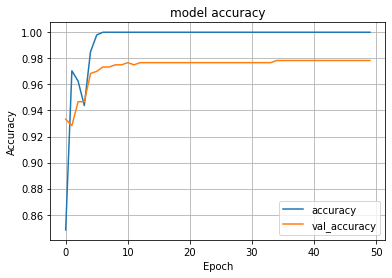

In [20]:
metrics[['accuracy', 'val_accuracy']].plot()
plt.grid()
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")

Text(0.5, 0, 'Epoch')

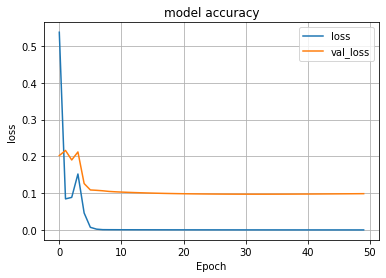

In [21]:
metrics[['loss', 'val_loss']].plot()
plt.grid()
plt.title("Model Loss")
plt.ylabel("loss")
plt.xlabel("Epoch")

In [22]:
_, acc= model.evaluate(x_test,y_test)
print("Accuracy =", (acc * 100.0), "%")

19/19 [==============================] - 1s 35ms/step - loss: 0.0986 - accuracy: 0.9783
Accuracy = 97.83333539962769 %


In [23]:
y_pred = model.predict(x_test)

In [24]:
mythreshold= 0.5
from sklearn.metrics import confusion_matrix
y_pred= (model.predict(x_test)>= mythreshold).astype(int)
cm= confusion_matrix(y_test, y_pred)
print(cm)

[[334   9]
 [  4 253]]


<AxesSubplot:>

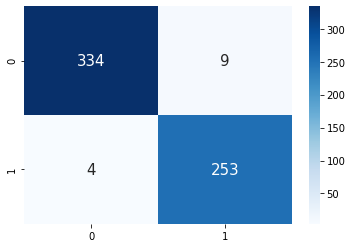

In [25]:
import seaborn as sns
sns.heatmap(cm, annot=True , cmap="Blues" , fmt="d", cbar=True, annot_kws={"size":10})
plt.title("Test Data")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")

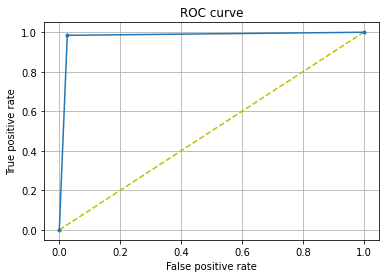

In [26]:
from sklearn.metrics import roc_curve
y_preds = model.predict(x_test).ravel()
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.figure(1)
plt.grid()
plt.plot([0, 1], [0, 1], 'y--')
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.show()

In [27]:
from sklearn.metrics import auc
auc_value = auc(fpr, tpr)
print("Area under curve, AUC = ", auc_value)

Area under curve, AUC =  0.9790983653049881


In [28]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       343
           1       0.97      0.98      0.97       257

    accuracy                           0.98       600
   macro avg       0.98      0.98      0.98       600
weighted avg       0.98      0.98      0.98       600

